In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

features_for_mood = ['energy', 'liveness', 'tempo', 'speechiness',
                                     'acousticness', 'instrumentalness', 'danceability', 'duration_ms',
                                     'loudness', 'valence']

data = pd.read_csv('/content/drive/MyDrive/music-mood-classification-main/tracks_6_emo.csv')
hyper_opt = False

#split into trainval and test
trainx, testx, trainy, testy = train_test_split(data[features_for_mood], data['mood'], test_size = 0.33,
                                                random_state = 42, stratify=data['mood'])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx)

nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, train_scaled, trainy, cv=5)
print ("cv score: " + str(scores.mean()))

if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(train_scaled, trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

cv score: 0.6271400271087477


In [16]:
from sklearn.model_selection import cross_validate

In [17]:
results = cross_validate(nn, train_scaled, trainy, return_train_score=True)

In [18]:
results

{'fit_time': array([4.44277859, 4.30520201, 2.13115096, 2.51992893, 4.61367559]),
 'score_time': array([0.00168729, 0.00174236, 0.00177622, 0.00188279, 0.00908113]),
 'test_score': array([0.61151079, 0.64028777, 0.63043478, 0.62318841, 0.63768116]),
 'train_score': array([0.68173599, 0.6835443 , 0.67870036, 0.67689531, 0.66064982])}

In [19]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [20]:
nn.fit(train_scaled, trainy)
test_preds = nn.predict(scaler.transform(testx))
accuracy_score(test_preds, testy)

0.6774193548387096

In [21]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [22]:
conf_matrix = confusion_matrix(testy, test_preds, labels = data['mood'].unique().tolist())

In [23]:
labels = data['mood'].unique().tolist()

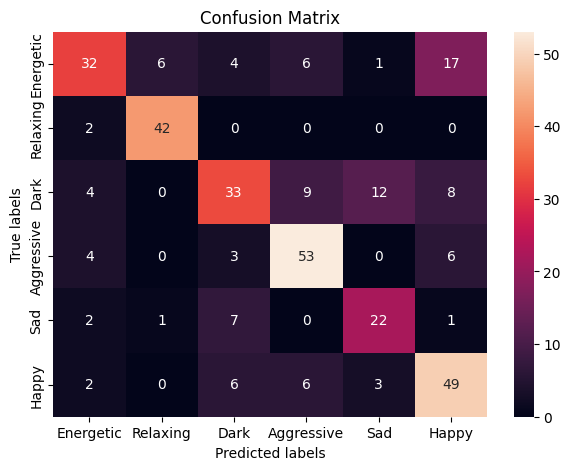

In [24]:
plt.rcParams['figure.figsize'] = (7,5)
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True)
#labels = data['mood'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [26]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(nn, train_scaled, trainy, cv=5)

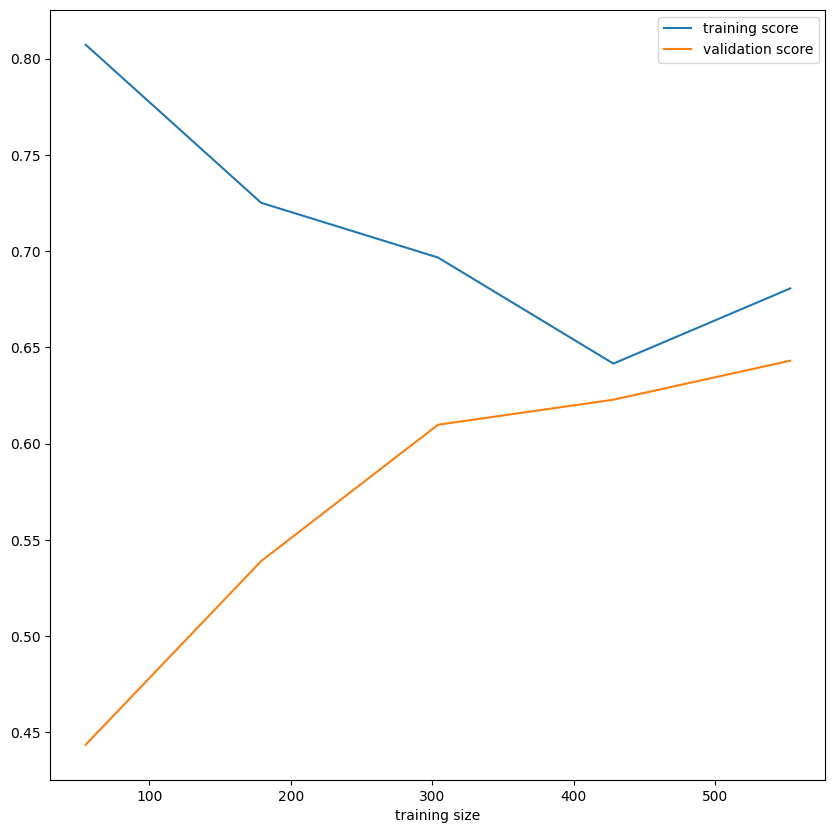

In [27]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='training score')
plt.plot(train_sizes, val_scores_mean, label='validation score')
plt.xlabel('training size')
plt.legend()